In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

The most recent date is ('2017-08-23',)
2016-08-23


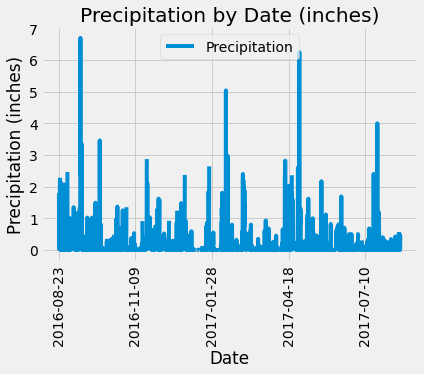

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(f'The most recent date is {recent_date}')
# Calculate the date one year from the last date in data set.
minus_one_year = dt.date(2017,8,23)-dt.timedelta(days = 365)
print(minus_one_year)
# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')
last_year_prcp
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns=['Date','Precipitation'])
last_year_prcp_df
# Sort the dataframe by date
sorted_df = last_year_prcp_df.sort_values('Date')
indexed_df = sorted_df.set_index('Date')
indexed_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = indexed_df.plot(rot=90, title='Precipitation by Date (inches)', xlabel='Date', ylabel='Precipitation (inches)')



In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
no_stations = session.query(Station.station).count()
no_stations

9

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).filter(Measurement.station=='USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

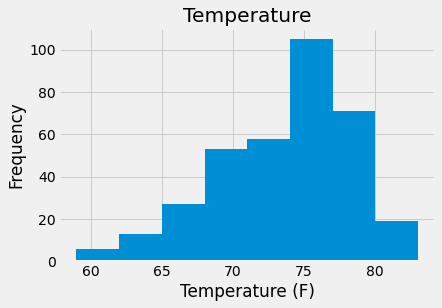

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
.filter(Measurement.date>= '2016-08-23').all()
temp_df = pd.DataFrame(most_active_temp, columns=['Temperature'])
temp_df

temp_df['Temperature'].describe()
bins = [59,62,65,68,71,74,77,80,83]

temp_df.hist(column='Temperature', bins=bins)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Close session

In [49]:
# Close Session
session.close()